<a href="https://colab.research.google.com/github/soyudea/Optimizacion/blob/main/NewtonRaphsonTallerEjercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

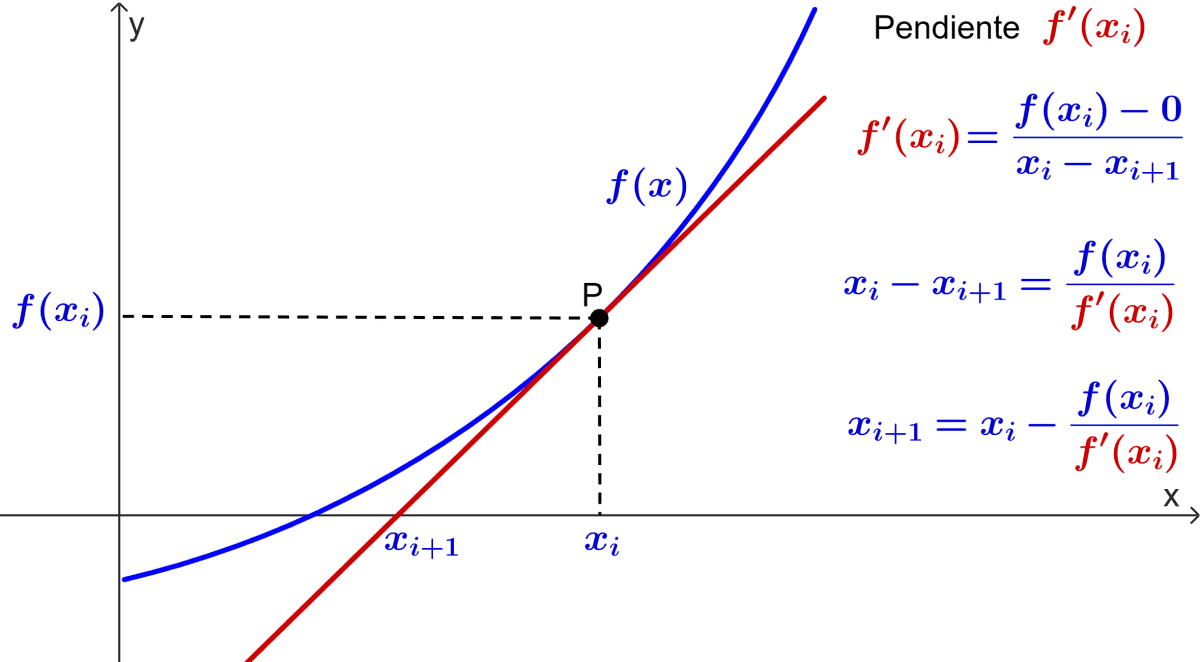

**Carga de librerías**

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols
from sympy import diff
from sympy import sin
from sympy import cos
from scipy.misc import derivative

**Ingreso valor inicial**

In [3]:
x0  = float(input("Ingrese el valor  x0 "))
err = float(input("Ingrese valor del error aceptable "))

Ingrese el valor  x0 -3
Ingrese valor del error aceptable 0.001


**f(𝑥) = 𝑥 3 + 2𝑥 2 − 4𝑥 + 8**

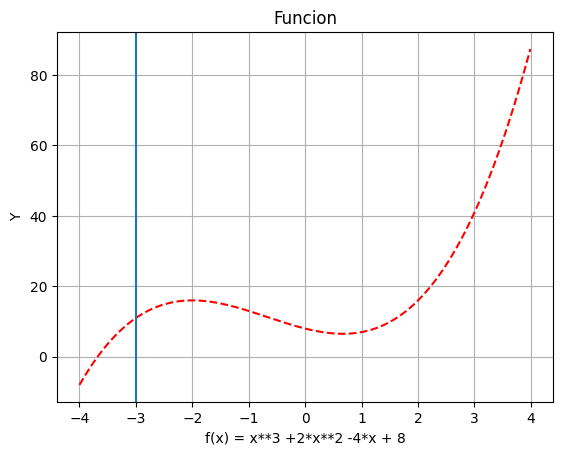

In [18]:
xl = -4
xu = 4

def graf_f():                                    #Grafica la raiz
  X = list(np.arange(xl, xu, 0.01))
  Y=[(x**3 +2*(x**2) -4*x + 8) for x in X]
  plt.title("Funcion")
  plt.xlabel("f(x) = x**3 +2*x**2 -4*x + 8")
  plt.ylabel("Y")
  plt.plot(X,Y, "r--")
  plt.axvline(x=-3, ymin=0.0, ymax=5)
  plt.grid()
  plt.show()
graf_f()

**Derivación simbólica**

In [11]:
x = symbols('x')
y = x**3 +2*x**2 -4*x + 8
fprime = diff(y,x)
print(fprime)

3*x**2 + 4*x - 4


**Clase Newton_Raphson**

In [12]:
#Esta clase calcula la raiz de una función**
class NewtonRaphson:
  def __init__(self, x0, err):
    self.__xi = x0
    self.__xlast = 0
    self.__f_last = 0
    self.__err = err
    self.__fd1 = 1
    self.__list_error = []

  def __derive(self, x):                                                        #Calcula simbólicamente la derivada
    fd1 = 3*x**2 + 4*x -4
    self.__fd1 = fd1

  def __cal_x_mas(self, x):                                                     #Calcula el Xi+1
    self.__derive(x)
    x_fut = 0
    if self.__fd1 != 0:
       x_fut = x - self.__f_last / self.__fd1
    return x_fut

  def __cal_f(self, x):                                                         #Calcula la función f(x)
      f = x**3 +2*x**2 -4*x + 8
      return f

  def __printf(self,i, x,f, fd1, dif_x):                                        #Muestra en consola los resultados parciale
      print("_______________________________________Resultados_________________________________________")
      print("i = ",i)
      print("x = ",x)
      print("f(x) = ",f)
      print("f'(x) = ", fd1)
      print("dif_x = ", dif_x)

  def getError(self):                                                           #Retorna lista de errores (Diferencia de las xi)
    return self.__list_error

  def Raiz(self):                                                               #Retorna la raiz
      dif_x = 1
      xlast = 0
      xfut =0
      i = 0
      self.__xi =2.5
      while  np.absolute(dif_x)> err:
         self.__f_last = self.__cal_f(self.__xi)
         xfut = self.__cal_x_mas(self.__xi)   #3
         self.__printf(i,self.__xi, self.__f_last, self.__fd1, dif_x)
         self.__xlast = self.__xi     #3
         self.__xi = xfut
         dif_x = self.__xi - self.__xlast
         self.__list_error.append(dif_x)
         i += 1

      return self.__f_last,  self.__xlast



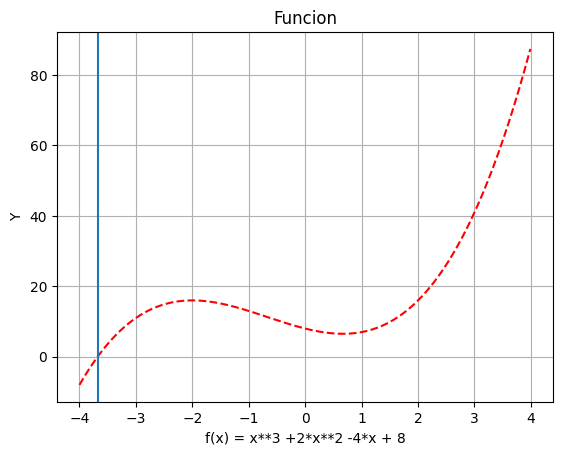

In [24]:
xl = -4
xu = 4

def graf_f():                                    #Grafica la raiz
  X = list(np.arange(xl, xu, 0.01))
  Y=[(x**3 +2*(x**2) -4*x + 8) for x in X]
  plt.title("Funcion")
  plt.xlabel("f(x) = x**3 +2*x**2 -4*x + 8")
  plt.ylabel("Y")
  plt.plot(X,Y, "r--")
  plt.axvline(x=-3.678574457754268, ymin=0.0, ymax=1)
  plt.grid()
  plt.show()
graf_f()

**Grafica error**

**Función principal**

In [27]:
listaError = []
obj = NewtonRaphson(x0, err)
def main():
  f, raiz = obj.Raiz()
  print("_______________________________Resultados de la busqueda de la raiz_____________________________")
  print("Raiz de f(x) = ", raiz)
  print("f(x) = ", f )                                                          #Imprime el valor de la raiz y f(raiz)
if  __name__=='__main__':
  main()
listaError = obj.getError()

_______________________________________Resultados_________________________________________
i =  0
x =  2.5
f(x) =  26.125
f'(x) =  24.75
dif_x =  1
_______________________________________Resultados_________________________________________
i =  1
x =  1.4444444444444444
f(x) =  9.40877914951989
f'(x) =  8.037037037037038
dif_x =  -1.0555555555555556
_______________________________________Resultados_________________________________________
i =  2
x =  0.27376685441201576
f(x) =  7.075347521255416
f'(x) =  -2.6800877106279875
dif_x =  -1.1706775900324287
_______________________________________Resultados_________________________________________
i =  3
x =  2.9137354991686264
f(x) =  38.06195773322966
f'(x) =  33.12450567402084
dif_x =  2.6399686447566104
_______________________________________Resultados_________________________________________
i =  4
x =  1.7646781182736955
f(x) =  12.664829720700912
f'(x) =  12.400979056436753
dif_x =  -1.149057380894931
__________________________________

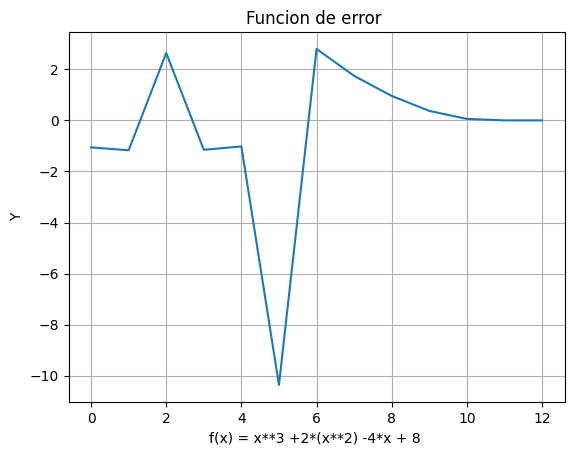

In [26]:
xl = 0
xu = 8

def graf_f():
  X = listaError
  #Y=[(2*math.sin(x) -(x**2)/10) for x in X]
  Y=[(x**3 +2*(x**2) -4*x + 8) for x in X]
  plt.title("Funcion de error ")
  plt.xlabel("f(x) = x**3 +2*(x**2) -4*x + 8 ")
  plt.ylabel("Y")
  plt.plot(listaError)
  plt.grid()
  plt.show()
graf_f()